In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
pathnames = ["/home/ivan/datasets/bilbao2019/processed/img/00203.png"]

In [13]:
def buildDataset(pathnames):
    pathDataset = tf.data.Dataset.from_tensor_slices(pathnames)
    
    def _howToRead(pathname):
        imageData = tf.cast(tf.image.resize_images(
            tf.image.decode_png(tf.read_file(pathname), channels=3), [227, 227]), tf.float32)
        return imageData
    
    def _howToRandomModify(img):
        #img = tf.image.random_hue(img, 0.1)
        #img = tf.image.random_brightness(img, 0.2)
        img = img + tf.random.uniform(img.shape, -40, 40)
        return img
    
    dataset = pathDataset.map(_howToRead)
    
    return dataset.concatenate(dataset.map(_howToRandomModify))

In [14]:
dataset = buildDataset(pathnames)

In [15]:
iterator = dataset.make_one_shot_iterator()
nextElement = iterator.get_next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


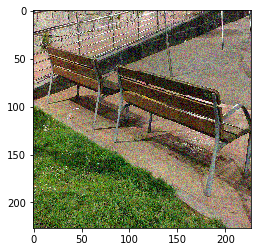

In [16]:
with tf.Session() as sess:
    while True:
        try:
            nextVal = sess.run(nextElement)
            #print("{}".format(nextVal))
            imgplot = plt.imshow(nextVal / 255)
        except tf.errors.OutOfRangeError:
            break
            